<a href="https://colab.research.google.com/github/rokmr/Machine-Learning/blob/main/src/colab/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import numpy as np
from torch import nn

import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split

In [2]:
# Basic functions
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def r2_score(y_true, y_pred):
    corr_matrix = np.corrcoef(y_true, y_pred)
    corr = corr_matrix[0, 1]
    return corr ** 2

def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

# Data Prepration

In [3]:
X, y = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=4)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

# Numpy

In [4]:
class LinearRegression:
    def __init__(self, learning_rate=0.001, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # init parameters
        self.weights = np.zeros(n_features)
        self.bias = 0

        # gradient descent
        for _ in range(self.n_iters):
            y_predicted = np.dot(X, self.weights) + self.bias

            # compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            # update parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        y_approximated = np.dot(X, self.weights) + self.bias
        return y_approximated

In [5]:
regressor = LinearRegression(learning_rate=0.01, n_iters=1000)
regressor.fit(X_train, y_train)
predictions = regressor.predict(X_test)

In [6]:
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)

accu = r2_score(y_test, predictions)
print("Accuracy:", accu)

MSE: 295.15511369424536
Accuracy: 0.9621321786806648


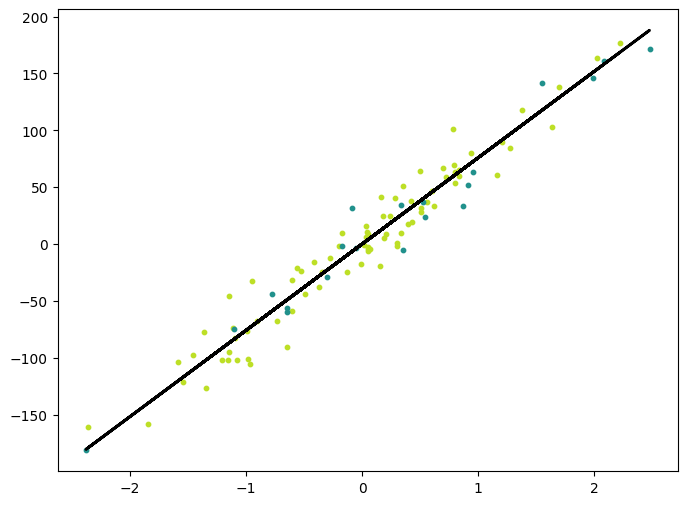

In [7]:
y_pred_line = regressor.predict(X)
cmap = plt.get_cmap("viridis")
fig = plt.figure(figsize=(8, 6))
m1 = plt.scatter(X_train, y_train, color=cmap(0.9), s=10)
m2 = plt.scatter(X_test, y_test, color=cmap(0.5), s=10)
plt.plot(X, y_pred_line, color="black", linewidth=2, label="Prediction")
plt.show()

# PyTorch

## Parameter

In [8]:
class LinearRegression(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegression, self).__init__()
        self.weights = nn.Parameter(torch.randn(input_dim, output_dim, requires_grad=True))
        self.bias = nn.Parameter(torch.randn(1, output_dim, requires_grad=True))

    def forward(self, x):
        return  torch.matmul(x, self.weights) + self.bias

In [9]:
EPOCHS = 1000
LEARNING_RATE = 0.01

model = LinearRegression(1, 1)
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=LEARNING_RATE)

X_train = torch.from_numpy(X_train).float()
y_train = torch.from_numpy(y_train).float().reshape(-1, 1)  # (80,) -> (80,1)

model.train()
for epoch in range(EPOCHS):
    preds = model(X_train)
    loss = loss_fn(preds, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{EPOCHS}] || Loss: {loss.item():.4f}')


predictions = model(torch.from_numpy(X_test).float())
predictions = predictions.detach().numpy()

Epoch [100/1000] || Loss: 460.4911
Epoch [200/1000] || Loss: 296.4025
Epoch [300/1000] || Loss: 290.4766
Epoch [400/1000] || Loss: 290.2609
Epoch [500/1000] || Loss: 290.2531
Epoch [600/1000] || Loss: 290.2528
Epoch [700/1000] || Loss: 290.2528
Epoch [800/1000] || Loss: 290.2527
Epoch [900/1000] || Loss: 290.2528
Epoch [1000/1000] || Loss: 290.2528


In [10]:
mse = mean_squared_error(y_test.reshape(-1,1), predictions)
print("MSE:", mse)

accu = r2_score(y_test, predictions.squeeze())
print("Accuracy:", accu)

MSE: 295.350488392873
Accuracy: 0.9621321765832672


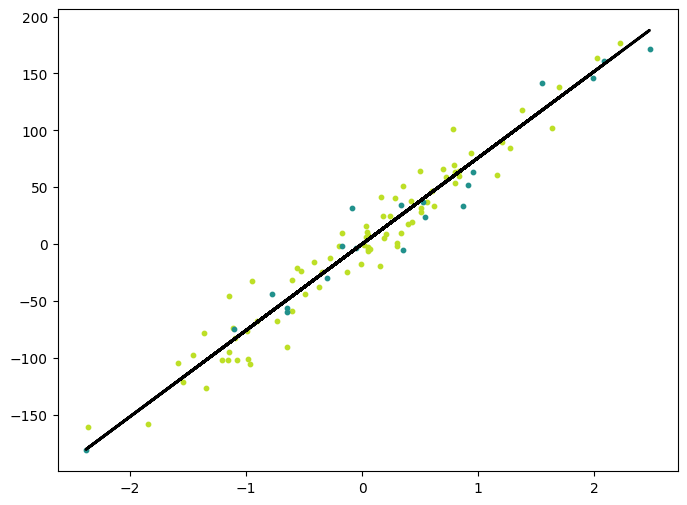

In [11]:
y_pred_line = model(torch.from_numpy(X).float())
y_pred_line = y_pred_line.detach().numpy()
cmap = plt.get_cmap("viridis")
fig = plt.figure(figsize=(8, 6))
m1 = plt.scatter(X_train, y_train, color=cmap(0.9), s=10)
m2 = plt.scatter(X_test, y_test, color=cmap(0.5), s=10)
plt.plot(X, y_pred_line, color="black", linewidth=2, label="Prediction")
plt.show()

## Linear Layer

In [12]:
class LinearRegressionV2(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegressionV2, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        return  self.linear(x)

In [13]:
model = LinearRegressionV2(1, 1)
optimizer = torch.optim.SGD(model.parameters(), lr=LEARNING_RATE)


model.train()
for epoch in range(EPOCHS):
    preds = model(X_train)
    loss = loss_fn(preds, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{EPOCHS}] || Loss: {loss.item():.4f}')


predictions = model(torch.from_numpy(X_test).float())
predictions = predictions.detach().numpy()

Epoch [100/1000] || Loss: 462.7935
Epoch [200/1000] || Loss: 296.4980
Epoch [300/1000] || Loss: 290.4803
Epoch [400/1000] || Loss: 290.2611
Epoch [500/1000] || Loss: 290.2531
Epoch [600/1000] || Loss: 290.2528
Epoch [700/1000] || Loss: 290.2528
Epoch [800/1000] || Loss: 290.2528
Epoch [900/1000] || Loss: 290.2528
Epoch [1000/1000] || Loss: 290.2527


In [14]:
mse = mean_squared_error(y_test.reshape(-1,1), predictions)
print("MSE:", mse)

accu = r2_score(y_test, predictions.squeeze())
print("Accuracy:", accu)

MSE: 295.35046833171384
Accuracy: 0.9621321775648273


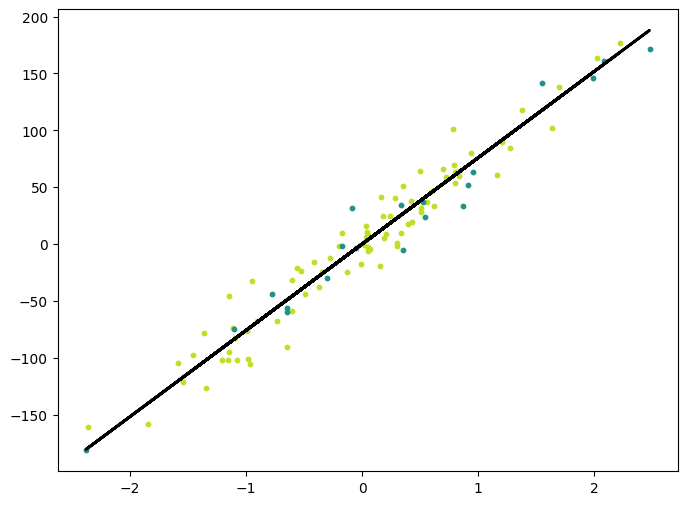

In [15]:
y_pred_line = model(torch.from_numpy(X).float())
y_pred_line = y_pred_line.detach().numpy()
cmap = plt.get_cmap("viridis")
fig = plt.figure(figsize=(8, 6))
m1 = plt.scatter(X_train, y_train, color=cmap(0.9), s=10)
m2 = plt.scatter(X_test, y_test, color=cmap(0.5), s=10)
plt.plot(X, y_pred_line, color="black", linewidth=2, label="Prediction")
plt.show()